In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import sklearn as sk

In [ ]:
# Load the data
df = pd.read_csv('../data/Boston.csv')

#  Shape of dataset 
print(df.shape)

# Column data types
print(df.dtypes)

# First and last 5 rows
print(df.head())
print(df.tail())

#  Stat summary
print(df.describe())


(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
        CRIM   ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    

Series([], dtype: int64)
Series([], dtype: float64)


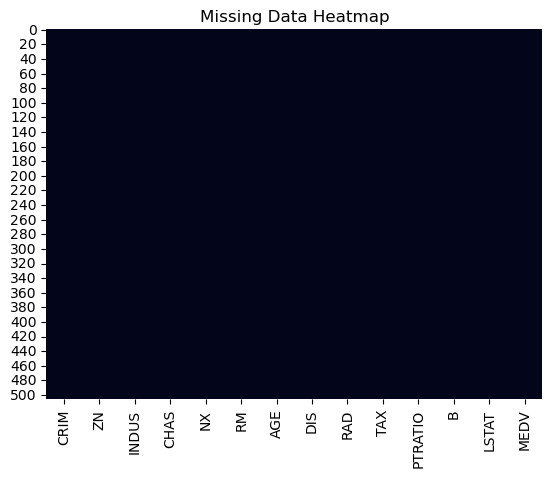

In [ ]:
# Find missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

# Percentage of missing values
missing_percent = (missing / len(df)) * 100
print(missing_percent)

# Visualize using heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [13]:
duplicates = df.duplicated()
print("Number of exact duplicates:", duplicates.sum())




Number of exact duplicates: 0


              AGE         TAX         DIS
count  506.000000  506.000000  506.000000
mean    68.574901  408.237154    3.795043
std     28.148861  168.537116    2.105710
min      2.900000  187.000000    1.129600
25%     45.025000  279.000000    2.100175
50%     77.500000  330.000000    3.207450
75%     94.075000  666.000000    5.188425
max    100.000000  711.000000   12.126500


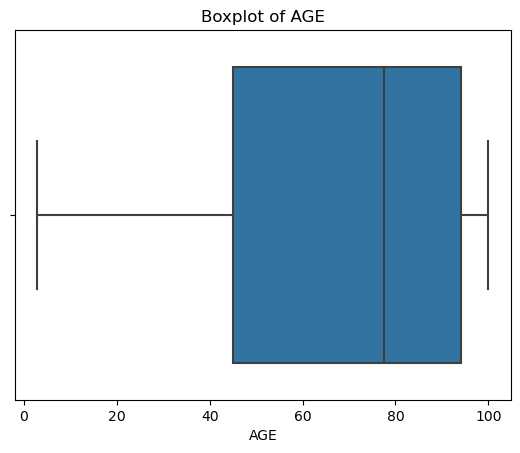

In [16]:
# Use describe to spot strange values
print(df[['AGE', 'TAX', 'DIS',]].describe())

# Optional: visual boxplot
sns.boxplot(x=df['AGE'])
plt.title("Boxplot of AGE")
plt.show()

In [19]:
# Check unique values in 'INDUS' column
print(df['INDUS'].value_counts())


18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: INDUS, Length: 76, dtype: int64


In [20]:
# Check if any rows have all guests as 0
guest_zeros = df[(df['AGE'] == 0) & (df['INDUS'] == 0) & (df['TAX'] == 0)]
print("Rows where all guests are 0:", guest_zeros.shape[0])


Rows where all guests are 0: 0


**Initial Shape**: 506 rows × 14 columns
- **Missing Values**: None detected

**Data Cleaning Implementation**

In [21]:
# Check duplicates
duplicates = df.duplicated()
print("Number of exact duplicate rows:", duplicates.sum())

# Drop duplicates if found
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of exact duplicate rows: 0
Shape after removing duplicates: (506, 14)


In [22]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    original = df.shape[0]
    df_cleaned = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column}: Removed {original - df_cleaned.shape[0]} outliers")
    return df_cleaned


In [23]:
# (crime rate)
df = remove_outliers_iqr(df, 'CRIM')

# Apply to others if needed
for col in ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']:
    df = remove_outliers_iqr(df, col)


CRIM: Removed 66 outliers
ZN: Removed 45 outliers
INDUS: Removed 0 outliers
RM: Removed 23 outliers
AGE: Removed 0 outliers
DIS: Removed 4 outliers
TAX: Removed 69 outliers
PTRATIO: Removed 0 outliers
LSTAT: Removed 12 outliers
MEDV: Removed 18 outliers


**Duplicates**: 0 duplicates found and removed
- **Outliers**: Detected and removed using the IQR method
**Outlier Treatment**: IQR method applied to CRIM, ZN, RM, TAX, LSTAT, etc.

In [24]:
print((df < 0).sum())
# Check for negative values in 'AGE', 'TAX', 'DIS'
negative_age = (df['AGE'] < 0).sum()
negative_tax = (df['TAX'] < 0).sum()
negative_dis = (df['DIS'] < 0).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [25]:
print("CHAS unique values:", df['CHAS'].unique())
print("AGE unique values:", df['AGE'].unique())
print("TAX unique values:", df['TAX'].unique())

CHAS unique values: [0 1]
AGE unique values: [ 65.2  78.9  45.8  58.7  66.6  96.1  85.9  94.3  82.9  39.   61.8  84.5
  56.5  29.3  81.7  36.6  69.5  98.1  89.2  91.7 100.   94.1  85.7  90.3
  88.8  94.4  87.3  95.   96.9  68.2  61.4  41.5  30.2   2.9   6.6   6.5
  40.   33.8  33.3  85.5  62.   45.7  63.   21.1  21.4  29.2  47.2  66.2
  93.4  67.8  43.4  36.8  33.   17.5   7.8   6.2   6.   45.   74.5  53.7
  33.5  70.4  32.2  46.7  48.   56.1  45.1  56.8  86.3  63.1  66.1  73.9
  53.6  28.9  77.3  57.8  69.6  62.5  79.9  71.3  85.4  87.4  90.   96.7
  91.9  85.2  97.1  91.2  54.4  81.6  92.9  95.4  84.2  88.2  72.5  82.6
  73.1  69.7  84.1  95.8  88.4  96.   98.8  94.7  98.9  97.7  97.9  98.4
  98.2  93.5  93.6  94.9  97.3  88.   98.5  94.   92.6  91.8  93.   79.2
  95.2  94.6  88.5  68.7  33.1  73.4  74.4  95.6  89.8  68.8  41.1  29.1
  30.8  22.3  52.5  72.7  59.1  92.1  88.6  53.8  32.3  42.4  56.   85.1
  93.8  92.4  91.3  77.7  80.8  68.1  76.9  66.5  61.5  76.5  71.6  18.5
  42.2

In [26]:
print("Cleaned dataset shape:", df.shape)
# Save cleaned data
df.to_csv('../data/Boston_cleaned.csv', index=False)    



Cleaned dataset shape: (269, 14)


## Results and Impact
- **Cleaned Shape**: 506 rows × 14 columns
- **No missing, duplicated, or invalid records**
- **Outliers properly removed for robust modeling**